### referencias úteis

* [Monte Carlo](https://pbpython.com/monte-carlo.html)
* [(Sukanta,2014)](https://www.ias.ac.in/article/fulltext/reso/019/08/0713-0739)

* [Feiguin](https://github.com/afeiguin/comp-phys/blob/master/10_01_montecarlo_integration.ipynb) 

* [Variância](https://mathworld.wolfram.com/Variance.html)

# Calculando o COT via DlogR por Monte Carlo de caixa adaptável

## Importação de módulos externos

In [1]:
import random
import numpy as np
import math
import random
import pandas as pd
from matplotlib import pyplot as plt
from IPython.display import clear_output
from datetime import datetime
import pytz



#Configurando figura e o rc parameters
%config InlineBackend.figure_format='retina'
plt.rcParams["figure.figsize"] = (10,5)
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size = 20)

### Funções de trabalho

In [2]:
#### Funções utilizadas #####
def dlogr(res,resb,x,xb,m):
    '''Função que determina o Delta log R dos pares ordenados de propriedades
    Resistividade e Sônico ou Resistividade ou Densidade. 
    Entradas:
    res, dados de resistividade
    reb, baseline
    x, canal de densidade ou sônico
    xb, baseline da densidade ou sônico
    m, coeficiente de cimentação
    Saída:
    DlogR, Delta Log R'''
    import math
    
    #Recurso computacional para eliminar os zeros:
    dummy = 1e-100000
    
    if np.size(res) > 1:
        dado  = len(res)
        DlogR = np.zeros(dado)
        res   = np.array(res)
        x     = np.array(x)
        resb  = np.min(res)
        xb    = np.median(x)
        for i in range(dado):
            DlogR[i]=math.log10(res[i]/(resb+dummy))+((1/np.log(10))*(m/(x[i]-xb))*(x[i]-xb))
            if x[i]/xb < 0:
                print(x[i]-xb)
                if res[i]/resb < 0:
                    print("Cuidado! Log negativo!",res[i]-resb)
     
    
    
    else:
        res = float(res)
        resb = float(resb)
        x = float(x)
        xb = float(xb)
        DlogR=math.log10(res/(resb+dummy))+((1/np.log(10))*(m/(x-xb))*(x-xb))
        
        
    return DlogR

def dlogr90(res,resb,x,xb):
    
    
    if np.size(res) > 1:
        dado  = len(res)
        DlogR = np.zeros(dado)
        res   = np.array(res)
        x     = np.array(x)
        resb  = np.min(res)
        xb    = np.median(x)
        for i in range(dado):
            DlogR[i]=math.log10(res[i]/(resb))+(0.02*(x[i]-xb))
            if x[i]/xb < 0:
                print(x[i]-xb)
                if res[i]/resb < 0:
                    print("Cuidado! Log negativo!",res[i]-resb)
    else:
        res = float(res)
        resb = float(resb)
        x = float(x)
        xb = float(xb)
        DlogR=math.log10(res/(resb))+(0.02*(x-xb))
        
    return DlogR

#############################

def passey16(drlog,alfa,beta,delta,eta,Tmax,gr,grb):
    '''Função que determina COT via delta log R
        Entradas:
    drlog,parâmetro calculado
    alfa, parâmetro estimado
    beta, parâmetro estimado
    delta, parâmetro estimado
    eta, parâmetro estimado
    Tmax, indicador de maturidade em oC
    gr, canal raio gama
    Saída:
    COT, Conteúdo orgânico total
    '''
    
    if np.size(drlog) > 1:
        dado = len(gr)
        COT  = np.zeros(dado)
        gr   = np.array(gr)
        grb  = np.median(gr) 
        for i in range(dado):
            COT[i] = (alfa*drlog[i] + beta*(gr[i]-grb))*10**(delta-eta*Tmax)
            #print(COT[i],delta-eta*Tmax)
    else:
        gr = float(gr)
        grb = float(grb)
        COT = (alfa*drlog + beta*(gr-grb))*10**(delta-eta*Tmax)
        
    return COT

## O método $\Delta_{log}R$ para determinação do COT sintético 

O método publicado por Passey et al. (1990) foi desenvolvido e testado pela
Exxon/Esso em 1979 e aplicado desde então em diversos poços pelo mundo. Passey
et al. (1990) partem do princípio de que as rochas são compostas por três componentes: a matriz, a matéria orgânica sólida e os fluidos que preenchem os poros. 

O método se baseia no fato de que uma rocha geradora possui respostas nos perfis
diferentes, mas proporcionais à sua maturação e ao seu conteúdo orgânico. Ou seja,
o perfil é sensível à variação de COT(Perfil Sônico) e a transformação da matéria
orgânica sólida em fluido(Perfil de Resistividade).
Logo, para aplicação do método são necessárias as curvas de perfil resistividade
e perfil sônico. O perfil sônico deve estar ajustado na escala de -100µs/pé para cada dois ciclos logarítmicos de resistividade. 

Após isso, uma linha base deverá ser
definida em um intervalo de uma rocha de granulometria fina não geradora, onde
as curvas de resistividade e sônico estejam sobrepostas. A separação das
curvas de Sônico e Resistividade em intervalos de rocha geradora é denominada de
∆LogR, que é linearmente relacionada ao teor de COT em função da maturidade
(PASSEY et al., 1990). 

### Determinação do $\Delta_{log}R$ via método de Passey (1990)

Passey et al (1990) propuseram um método que estima o COT sintético baseada curvas que indicam a escala de porosidade da rocha alvo. Essas informações de porosidade são retiradas de dois perfis o perfil sônico que mede o tempo de trânsito e o perfil de resistividade que infere a resistividade na rocha estudada. As informações de porosidade assiciada a leitura desses dois perfis indicam a aviabilidade de ocorrência de rochas com alto conteúdo de matéria orgância. O conteúdo de querogênio associado ao alto conteúdo de matéria orgânica ocasiona um efeito nos dois perfis mensionados acima. Os efeitos são: baixa no valor de densidade e baixa no valor de tempo de trânsito. Além disso o perfil de resistividade apresenta uma alta na presença do kerogênio em rochas com alta porosoidade. 


\begin{equation}
\Delta_{log}R = log_{10} \big{(} \dfrac{R}{R_{baseline}} \big{)} + 0.02 \times (DT - DT_{baseline})
\end{equation}

### Solução genérica da função de Passey e Wang via método para determinação do $\Delta_{log}R$. 

Wang revisitou a equação de Passey e com base nos teores de vitrinita e curvas de R, DT, RHO e GR cria uma nova relação empírica para os folhelhos devonianos. Note que é possível calcular o $\Delta_{log}R $ de duas maneiras possíveis.

\begin{equation}
\Delta_{log}R = log_{10} \big{(} \dfrac{R}{R_{baseline}} \big{)} + \dfrac{1}{ln 10} \dfrac{m}{(DT - DT_{m})} \times (DT - DT_{baseline})
\end{equation}

\begin{equation}
\Delta_{log}R = log_{10} \big{(} \dfrac{R}{R_{baseline}} \big{)} + \dfrac{1}{ln 10 } \dfrac{m}{(RHO_{m} - RHO)} \times (RHO  - RHO_{baseline})
\end{equation}

\begin{equation}
COT = [ \alpha \Delta_{log}R + \beta (GR - GR_{baseline}) ] \times 10^{(\delta-\eta Tmax)}
\end{equation}


Onde $DT_{m}$ é o canal sônico medida em tempo de trânsito ($\mu s/ft$), $\textbf{m}$ representa o coeficiente de cimentação, $RHO$ e $RHO_{baseline}$ representam o canal de densidades e sua média em ($g/cm^{3}$), $R$ e $R_{baseline}$ são  o canal de resistividade e o valor de base correspondente, $[\alpha, \beta,\delta,\eta]$ sãos constantes da equação que varia de acordo com a formação geológica e $T_{max}$ é o indicador de maturidade ($^{\circ} C$), $GR$ é o canal de raio gamma e o $GR_{baseline}$ é a média do canal raio gama (API).



### Tabela de coeficientes (Mahmud,2015)

A tabela original publicada é composta 4 subtabelas geradas por quatro modelos de inteligência artificial. Abaixo é apresentada uma dessas tabelas. Esses dados foram utilizados para compilar uma nova tabela para o cálculo dos coeficientes via monte carlo. Esse arquivo foi denominado dado.txt

Dados (n = 671) |   R  | DT   | GR  | RHOB | COT |
----------------|-------|------|-----|------|-----|
Mínimo          | 4.97  |50.95 |27.37| 2.39 | 0.76| 
Máximo          |163.6  |97.1  |146.9| 2.7  |  5.1|
Alcance         |158.6  |  46.1|119.6| 0.3  | 4.4 |
Desvio Padrão   |39.81  |8.20  |21.63|0.07  |0.96 | 
Variância       |1585   | 67   |468  |0.0044|0.916|

# 1) Dados de entrada

## 1.1) Poços: 

Cálculo da COT baseado no chute inicial com os coeficientes retirados da seção devoniana de Mahmoud (2015)

In [3]:
#dado de classificação
#cab = ['Depth','Cali','DT','DTS','GR','INPEFA_1','INPEFA_2','INPEFA_3','INPEFA_4','LITO','NPHI','OG','RESD',
#       'RESM','RESS','RHOB','TVD']
#datarealC = pd.read_csv('../entradas/las/1-ESS-186_resample.las', sep='\\s+',
#                       skiprows=80, names = cab, usecols=(0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16))
#dfrC = pd.DataFrame(datarealC)
#print(len(dfrC))
#separando as informações do dado em variáveis distintas
#zrC = dfrC[dfrC.columns[0]]#prof
#DTrC = dfrC[dfrC.columns[2]]#sonico
#NPHIrC = dfrC[dfrC.columns[10]]#neutrao
#RHOBrC = dfrC[dfrC.columns[15]]#densidade
#GRrC = dfrC[dfrC.columns[4]]#GR
#ILDrC = dfrC[dfrC.columns[13]]#resistividade
#coderC = dfrC[dfrC.columns[1]]#código 
#rockerC = dfrC[dfrC.columns[0]]#rocha
#print(ILDrC)

In [4]:
#dado de treinamento
cab = ['Depth','Cali','DT','GR','INPEFA_1','INPEFA_2','INPEFA_3','INPEFA_4','LITO','LLD','NPHI','OG','RHOB']
datareal = pd.read_csv('../entradas/las/1-ESS-120_resample.las', sep='\\s+',
                       skiprows=80, names = cab, usecols=(0,1,2,3,4,5,6,7,8,9,10,11,12))
df = pd.DataFrame(datareal)
print(len(df))
#separando as informações do dado em variáveis distintas
z = df[df.columns[0]]#prof
DT = df[df.columns[2]]#sonico
NPHI = df[df.columns[10]]#neutrao
RHOB = df[df.columns[12]]#densidade
GR = df[df.columns[3]]#GR
LLD = df[df.columns[9]]#resistividade
#code = df[df.columns[1]]#código 
#rocke = df[df.columns[0]]#rocha
#print(z)

21755


## 1.2) Preprocessamento

In [5]:
# Retira as colunas:
df=df.drop('INPEFA_1',axis=1) #retira a coluna da profundidade duplicada
df=df.drop('INPEFA_2',axis=1) #retira a coluna caliper
df=df.drop('INPEFA_3',axis=1) #retira a coluna nphi
df=df.drop('INPEFA_4',axis=1) #retira a coluna drho
df=df.drop('LITO',axis=1) #retira a coluna ild
df=df.drop('OG',axis=1) #retira a coluna ild

In [6]:
#Inverte as linhas do dataframe e reseta os índices:
#df=df[::-1].reset_index()
print(df)

           Depth    Cali      DT         GR     LLD    NPHI    RHOB
0      2062.7046 -9999.0 -9999.0   31.94041 -9999.0 -9999.0 -9999.0
1      2062.9046 -9999.0 -9999.0   31.08434 -9999.0 -9999.0 -9999.0
2      2063.1046 -9999.0 -9999.0   27.46704 -9999.0 -9999.0 -9999.0
3      2063.3046 -9999.0 -9999.0   25.54523 -9999.0 -9999.0 -9999.0
4      2063.5046 -9999.0 -9999.0   30.65045 -9999.0 -9999.0 -9999.0
...          ...     ...     ...        ...     ...     ...     ...
21750  6412.7046 -9999.0 -9999.0  158.40270 -9999.0 -9999.0 -9999.0
21751  6412.9046 -9999.0 -9999.0  158.40270 -9999.0 -9999.0 -9999.0
21752  6413.1046 -9999.0 -9999.0  158.40270 -9999.0 -9999.0 -9999.0
21753  6413.3046 -9999.0 -9999.0  158.40270 -9999.0 -9999.0 -9999.0
21754  6413.5046 -9999.0 -9999.0  158.40270 -9999.0 -9999.0 -9999.0

[21755 rows x 7 columns]


In [7]:
#Filtra os expúrios ferramentais:
df=df[(df['RHOB'] != -9999.0) & (df['RHOB'] != -999999.9999)] 
df=df[(df['DT'] != -9999.0) & (df['DT'] != -999999.9999)]
df=df[(df['GR'] != -9999.0) &  (df['GR'] != -999999.9999)]
df=df[(df['Cali'] != -9999.0) &  (df['Cali'] != -999999.9999)]
df=df[(df['NPHI'] != -9999.0) &  (df['NPHI'] != -999999.9999)]
df=df[(df['LLD'] != -9999.0) &  (df['LLD'] != -999999.9999)]

In [8]:
#----------------------------------------------------------#
#            Filtra trechos desmoronados:                  #
#----------------------------------------------------------#
#Parametros do poço:
# diametro = 9 pol
# lam = +/- 2 pol (limite aceitavel maximo)
dim = 9
delta = 2
ls = dim + delta
li = dim - delta

#I - filtragem caliper:

df=df[(df['Cali'] >= li) & (df['Cali'] <= ls)]#informação baseada diametro do poco

# II - filtragem visual: selecao de um alvo especifico idade ou grupo
#topo =1750.0
#base = 2300.0
#df=df[(df['Depth1(m)'] >= topo) & (df['Depth1(m)'] <= base)] # alvo! 

In [9]:
print(df)

           Depth      Cali        DT        GR        LLD      NPHI      RHOB
13687  4800.1046  8.609600  70.30501  157.6507  60.520000  14.05369  2.616479
13688  4800.3046  8.609600  73.25121  127.1674  60.520000  11.76468  2.605533
13689  4800.5046  8.609600  76.35267  119.7623  60.520000  17.90119  2.585634
13690  4800.7046  8.612160  78.27454  124.3640  60.520000  21.43119  2.587109
13691  4800.9046  8.609489  76.25685  119.4625  60.520000  19.73067  2.608446
...          ...       ...       ...       ...        ...       ...       ...
21666  6395.9046  8.773004  74.54109  158.4027   6.856156  12.76359  2.693078
21667  6396.1046  8.610085  73.37498  158.4027   7.194987  12.04690  2.707989
21668  6396.3046  8.589809  72.57875  158.4027   8.382991  11.25337  2.676428
21669  6396.5046  8.569765  72.42371  158.4027   8.709688  11.04827  2.661956
21670  6396.7046  8.535995  72.51006  158.4027   8.614051  11.58292  2.664151

[7340 rows x 7 columns]


In [10]:
# renomeia os vetores filtrados
z = df[df.columns[0]]#prof
DT = df[df.columns[2]]#sonico
NPHI = df[df.columns[5]]#neutrao
RHOB = df[df.columns[6]]#densidade
GR = df[df.columns[3]]#GR
LLD = df[df.columns[4]]#resistividade

In [11]:
# CAlculo do baseline para o dado real
GRbaseline = np.min(GR)
DTbaseline = np.min(DT)
LLDbaseline = np.min(LLD)

print(LLDbaseline)

0.1802541352216242


## 1.2) Mahmoud (2015):

Dados utilizados para a definição do cálculo dos parâmetros ótimos da inversão via MC.

In [12]:
# lendo os dados da tabela:
cab = ['DR', 'DT', 'GR', 'RHO', 'COT']
data = pd.read_csv('../entradas/dado.txt', sep='\\s+',skiprows=1, names = cab, usecols=(0,1,2,3,4))
dfm = pd.DataFrame(data)
print(len(dfm))
#separando as informações do dado em variáveis distintas
DRm = dfm[dfm.columns[0]]
DTm = dfm[dfm.columns[1]]
GRm = dfm[dfm.columns[2]]
RHOm = dfm[dfm.columns[3]]
COTm = dfm[dfm.columns[4]]
#print(type(DR))
#df


20


In [13]:
# Valores máximos e mínimos de cada coluna baseados em mahmoud
dtmax = np.argmax(np.array(dfm['DT']))
dtmin = np.argmin(np.array(dfm['DT']))
###############################
grmax = np.argmax(np.array(dfm['GR']))
grmin = np.argmin(np.array(dfm['GR']))
###############################
resmax = np.argmax(np.array(dfm['DR'])) 
resmin = np.argmin(np.array(dfm['DR']))
###############################
rhomax = np.argmax(np.array(dfm['RHO']))
rhomin = np.argmax(np.array(dfm['RHO']))
###############################
cotmax = np.argmax(np.array(dfm['COT']))
cotmin = np.argmin(np.array(dfm['COT']))

print(resmin,grmin, rhomin)

0 13 1


In [14]:
dr = [DRm[0],DRm[1],DRm[5],DRm[6],DRm[10],DRm[11],DRm[15],DRm[16]]
dt = [DTm[0],DTm[1],DTm[5],DTm[6],DTm[10],DTm[11],DTm[15],DTm[16]]
gr = [GRm[0],GRm[1],GRm[5],GRm[6],GRm[10],GRm[11],GRm[15],GRm[16]]
rho = [RHOm[0],RHOm[1],RHOm[5],RHOm[6],RHOm[10],RHOm[11],RHOm[15],RHOm[16]]
cot = [COTm[0],COTm[1],COTm[5],COTm[6],COTm[10],COTm[11],COTm[15],COTm[16]]

#### O baseline é geralmente determinado na formação que não é rica em MO e aonde nessa rocha tem as curvas de DT e GR se cruzando. 

In [15]:
resbaseline = LLDbaseline # min(dr)/2   #np.sum(dr)/len(dr)
dtbaseline  = DTbaseline # min(dt)/2    #np.sum(dt)/len(dt)
grbaseline  = GRbaseline # min(gr)/2    #np.sum(gr)/len(gr)
print(resbaseline, dtbaseline, grbaseline)

0.1802541352216242 47.99772 4.749098


# 2) Calculando o DrLog usando os valores tabelados

In [16]:
 #joga na funcao do deltalogR

dLOGr = dlogr(resmax,resbaseline,dtmax,dtbaseline,2)

#Cálculo do dlogR via passey et al. (1990)

dLOGr90 = np.zeros(len(GR))

for i in range (len(dr)):
    dLOGr90[i] = dlogr90(dr[i],resbaseline,dt[i],dtbaseline)
    print(dLOGr90[i])


1.4995167520501447
3.9391465480534804
1.5561167520501444
3.8971465480534806
1.5205167520501446
3.9399436626521163
1.4995167520501447
3.9399436626521163


# 3) Monte Carlo com caixa adaptativa por porcentagem variada

In [17]:
# Variáveis do modelo de monte carlo!

# com base nas tentativas e erros anteriores ]
# definir primeiramente as caixas eta e delta!!!!!!!!
# PEGAR O VALOR DE TMAX DA TABELA DO ANDRE
p = [1.08,0.95,1.0,0.005,440]
nbox=10
porcentagem = 50
porcentagem = porcentagem/100
npts = 20000
nloop = npts
alfa_otimo=1.08
beta_otimo=0.95
delta_otimo=1.0
eta_otimo=0.005

#Alocação dinâmica
otimo=np.zeros((nbox,5))
beta  = np.zeros(npts)
eta   = np.zeros(npts)
alfa  = np.zeros(npts)
delta = np.zeros(npts)
cot_c = np.zeros((nloop,len(dr)))
phi = np.zeros(nloop)
PHI = np.copy(phi)
cot_verdadeiro = np.copy(cot)


In [18]:
# O monte carlo
for k in range(nbox):
    alfamin  = (alfa_otimo - porcentagem*alfa_otimo) 
    alfamax  = (alfa_otimo + porcentagem*alfa_otimo) 
    betamin  = (beta_otimo - porcentagem*beta_otimo) 
    betamax  = (beta_otimo + porcentagem*beta_otimo) 
    deltamin = (delta_otimo - porcentagem*delta_otimo) 
    deltamax = (delta_otimo + porcentagem*delta_otimo)
    etamin   = (eta_otimo - porcentagem*eta_otimo) 
    etamax   = (eta_otimo + porcentagem*eta_otimo) 
    phi = np.zeros(nloop)
    
    for i in range(nloop):
        beta[i]  = random.uniform(betamin, betamax)
        alfa[i]  = random.uniform(alfamin, alfamax)
        eta[i]   = random.uniform(etamin, etamax)
        delta[i] = random.uniform(deltamin, deltamax)
        #print(alfa[i],beta[i],eta[i],delta[i])
        for j in range(len(dr)):
            cot_c[i,j] = passey16(dLOGr90[j],alfa[i],beta[i],delta[i],eta[i],p[4],gr[j],grbaseline)
            #print(cot_c[i])
            # funcao phi:
            phi[i] += (cot_verdadeiro[j] - cot_c[i,j])**2
            PHI[i] += np.sqrt(np.sum((cot_verdadeiro[j]-cot_c[i,j])**2)/len(cot))
            
    imelhor = np.argmin(phi)  # localizar o indice do menor elemento do vetor phi
    # parametros finais:
    alfa_otimo = alfa[imelhor]
    beta_otimo = beta[imelhor]
    delta_otimo = delta[imelhor]
    eta_otimo = eta[imelhor]
    cot_otimo = cot_c[imelhor]
    print(k,alfa_otimo,beta_otimo,delta_otimo,eta_otimo,phi[imelhor])
     # cria matriz de parâmetros 
    P = np.stack((alfa_otimo,beta_otimo,delta_otimo,eta_otimo))# com o último parâmetro
    otimo[k] = (alfa_otimo,beta_otimo,delta_otimo,eta_otimo,phi[imelhor])# com todos os ótimos parâmetros

0 0.5865726588288794 1.2644878607276264 0.9663937376849351 0.005729685679960739 0.02573627013844474
1 0.32612505639792194 1.3579716982361578 0.6743294321804678 0.005130756292981559 0.02561641479641429
2 0.34169321981415063 1.667837830860583 0.7522594988584064 0.00550987559056995 0.02564567907469308
3 0.40659094927575795 1.1054657232099983 0.5969915403544398 0.0047557305886105974 0.025627764685915492
4 0.34353077456547054 1.1390150640521794 0.3830132803421652 0.004296417711946457 0.025606822189794088
5 0.38584127172898697 1.6093477711796957 0.33605046790150594 0.00452981617480787 0.02563088944553454
6 0.3697147378070881 1.1541276127253592 0.47928555147271684 0.00452910704647979 0.025598734073979175
7 0.46072974142713574 1.4255599445817295 0.5498702993809574 0.004898179684369341 0.025601222315838695
8 0.3340976752967074 1.6775148190348146 0.8037871044107682 0.005632700343834229 0.025662871399300586
9 0.3755008326470921 1.1192127450727385 1.0936859055398307 0.005894974753856065 0.02563296

In [19]:
#Limites da caixa
print("Caixa eta->",etamin,etamax,eta_otimo)
print("Caixa delta->",deltamin,deltamax, delta_otimo)
print("Caixa beta->",betamin,betamax, beta_otimo)
print("Caixa alfa->",alfamin,alfamax, alfa_otimo)

Caixa eta-> 0.0028163501719171147 0.008449050515751344 0.005894974753856065
Caixa delta-> 0.4018935522053841 1.2056806566161522 1.0936859055398307
Caixa beta-> 0.8387574095174073 2.516272228552222 1.1192127450727385
Caixa alfa-> 0.1670488376483537 0.5011465129450612 0.3755008326470921


In [20]:
PHI_abs = np.sqrt(np.sum((cot_verdadeiro-cot_otimo)**2)/len(cot))
print(PHI_abs)

0.05660495669006201


In [21]:
#for i in range (len(cot)):
#    print(np.array(dLOGr90[i]),np.array(GR[i]-grbaseline),cot_otimo[i])

# 4) Avaliação do método de monte carlo via cálculo do resíduo quadrático

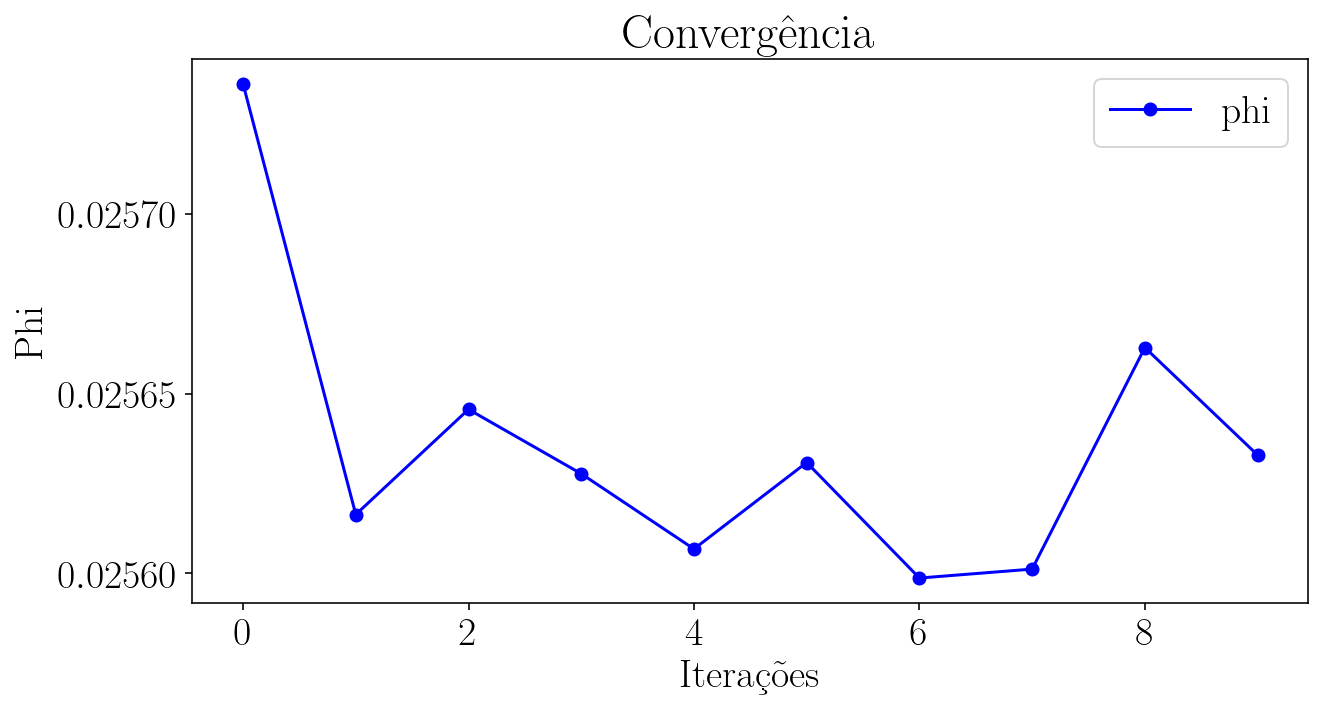

In [22]:
plt.plot(range(nbox),otimo[:,4], 'bo-',label='phi')# valores de eta por phi
plt.title('Convergência')
plt.xlabel('Iterações')
plt.ylabel('Phi')
plt.legend()

In [23]:
otimo[:,0]

array([0.58657266, 0.32612506, 0.34169322, 0.40659095, 0.34353077,
       0.38584127, 0.36971474, 0.46072974, 0.33409768, 0.37550083])

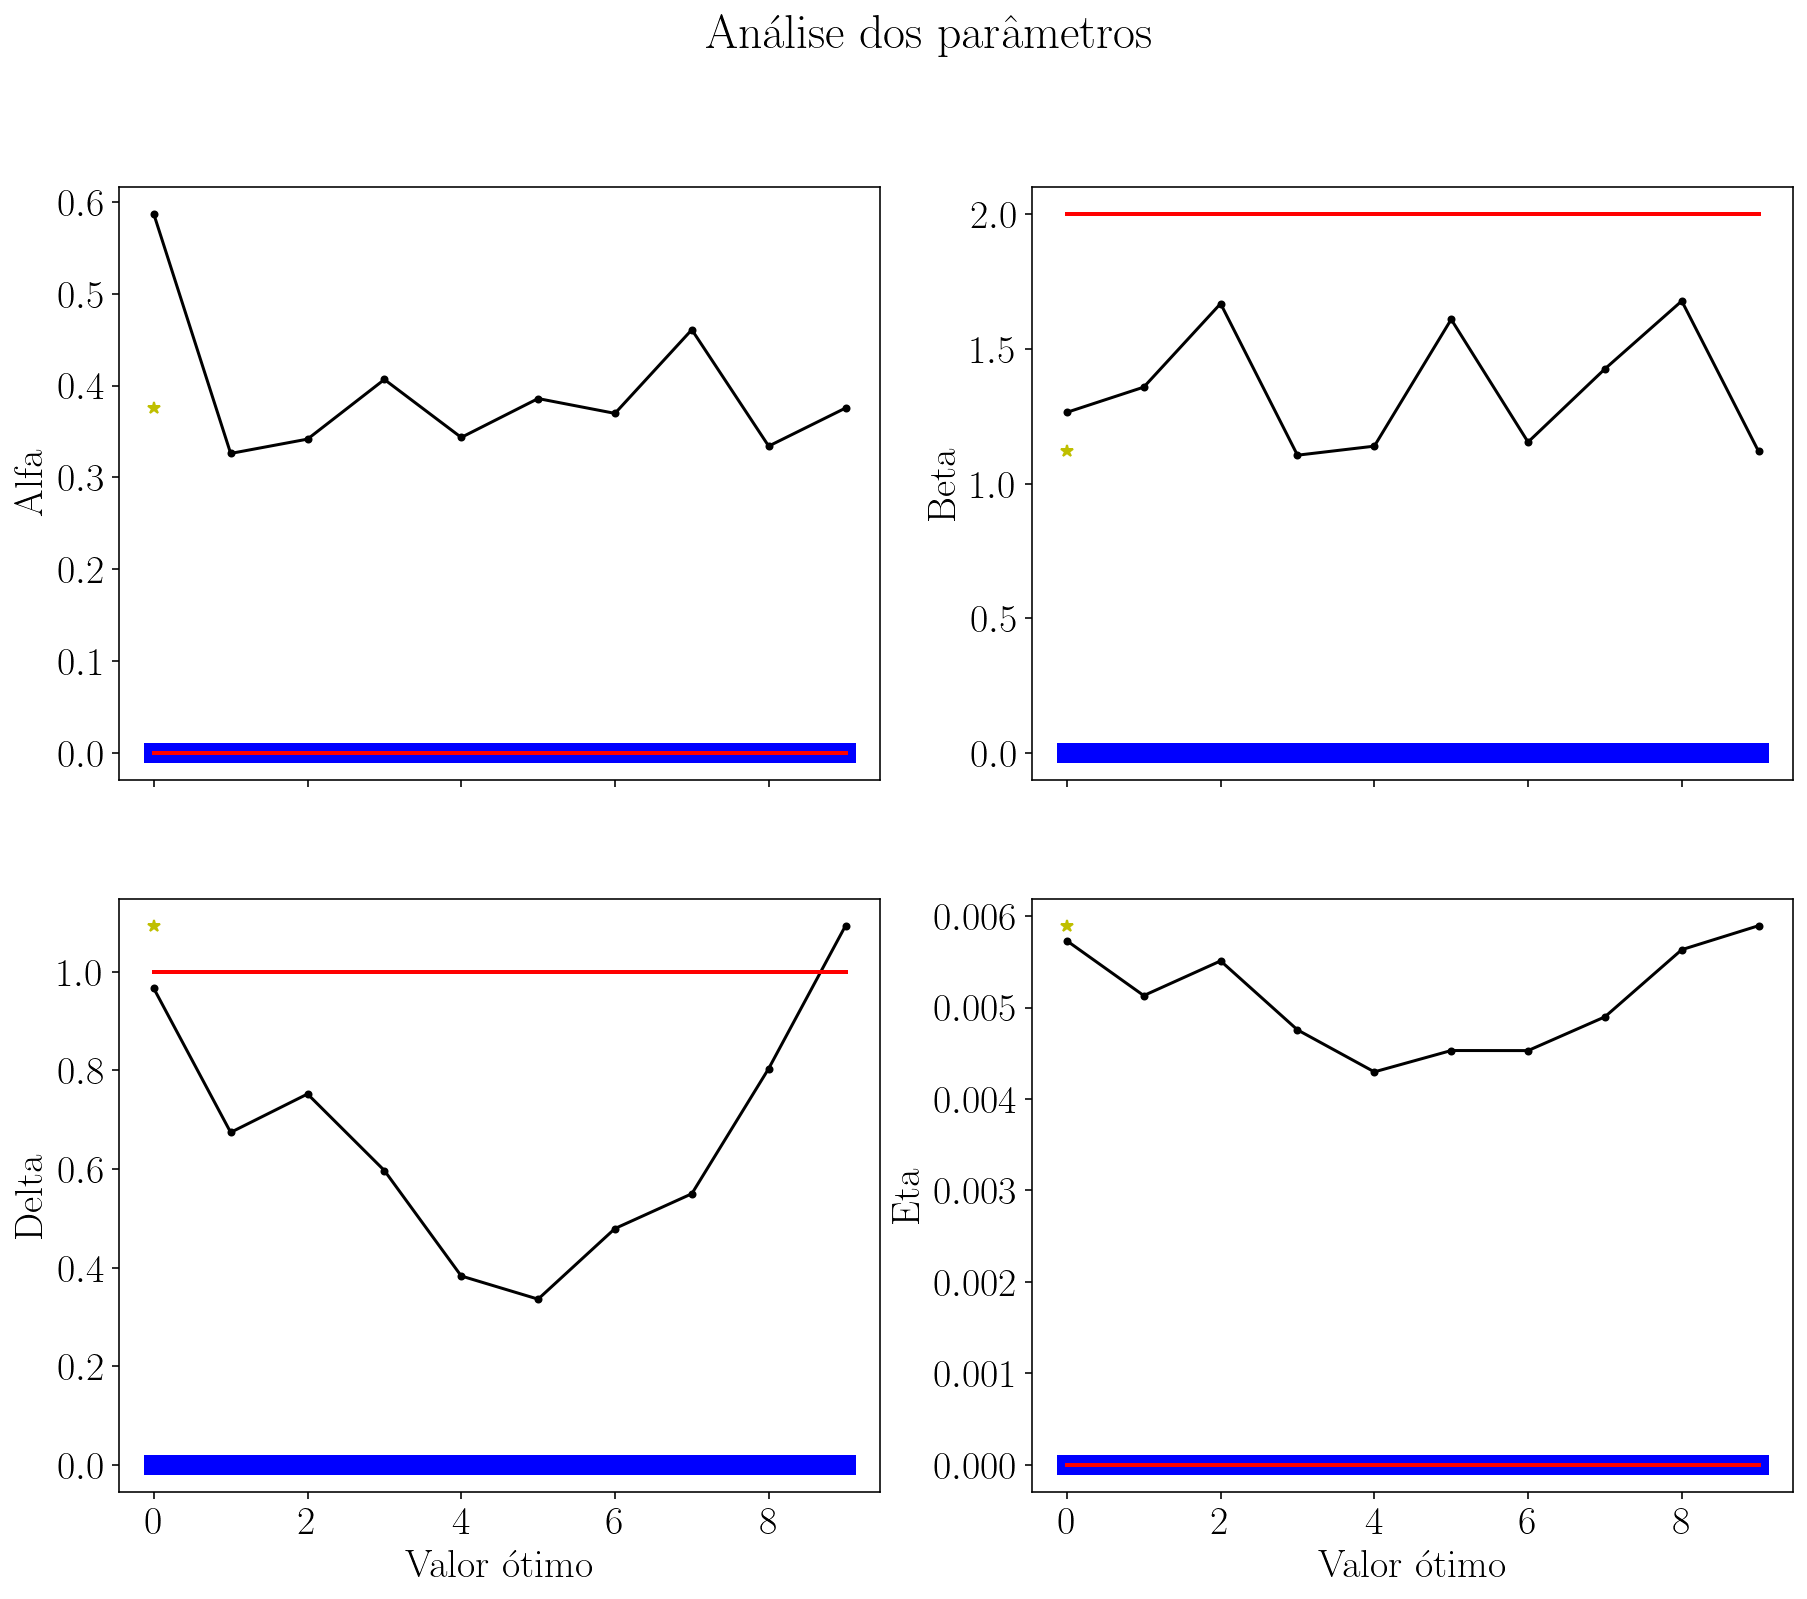

In [24]:
#fig, ax = plt.subplots(2,2, figsize=(15, 8), sharex=True, sharey=True)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12), sharex=True, sharey=False)
fig.suptitle('Análise dos parâmetros')

ax1.plot(range(nbox),otimo[:,0],'k.-')
ax1.plot(range(nbox),np.full_like(range(nbox),alfamin),'b-',linewidth=10)
ax1.plot(range(nbox),np.full_like(range(nbox),alfamax),'r-',linewidth=2)
ax1.plot(alfa_otimo,'*y')
ax1.set_ylabel('Alfa')

ax2.plot(range(nbox),otimo[:,1],'k.-')
ax2.plot(range(nbox),np.full_like(range(nbox),betamin),'b-',linewidth=10)
ax2.plot(range(nbox),np.full_like(range(nbox),betamax),'r-',linewidth=2)
ax2.plot(beta_otimo,'*y')
ax2.set_ylabel('Beta')

ax3.plot(range(nbox),otimo[:,2],'k.-')
ax3.plot(range(nbox),np.full_like(range(nbox),deltamin),'b-',linewidth=10)
ax3.plot(range(nbox),np.full_like(range(nbox),deltamax),'r-',linewidth=2)
ax3.plot(delta_otimo,'*y')
ax3.set_xlabel('Valor ótimo')
ax3.set_ylabel('Delta')

ax4.plot(range(nbox),otimo[:,3], 'k.-')
ax4.plot(range(nbox),np.full_like(range(nbox),etamin),'b-',linewidth=10)
ax4.plot(range(nbox),np.full_like(range(nbox),etamax),'r-',linewidth=2)
ax4.plot(eta_otimo,'*y')
ax4.set_xlabel('Valor ótimo')
ax4.set_ylabel('Eta')

#plt.legend()
plt.savefig('../saidas/Analise_parametros_MC.png')

In [25]:
#Salva o log file e figura
# data atual
minimo = alfa_otimo,beta_otimo,delta_otimo,eta_otimo,phi[imelhor]
local = datetime.now()
H = local.strftime("%d%m%Y%H%M%S")
# Salva o melhor valor em um arquivo de log
minimo = pd.DataFrame(minimo)
minimo.to_csv('../log/MC'+H+'.txt',sep=' ', index=False)
plt.savefig('../saidas/MC'+H+'.png')

<Figure size 720x360 with 0 Axes>

# 5) Calculando o COT para os dados da Bacia do Espírito Santo


## 5.1) Poço de treinamento 1-ESS-120_resample

In [26]:
deltaLR = dlogr90(LLD,LLDbaseline,DT,DTbaseline)

#deltaLR = dlogr(LLD,resbaseline,DT,dtbaseline,2)

In [27]:
cot_calc = passey16(deltaLR,alfa_otimo,beta_otimo,delta_otimo,eta_otimo,p[4],GR,GRbaseline)

In [28]:
mincot=np.min(cot_calc)

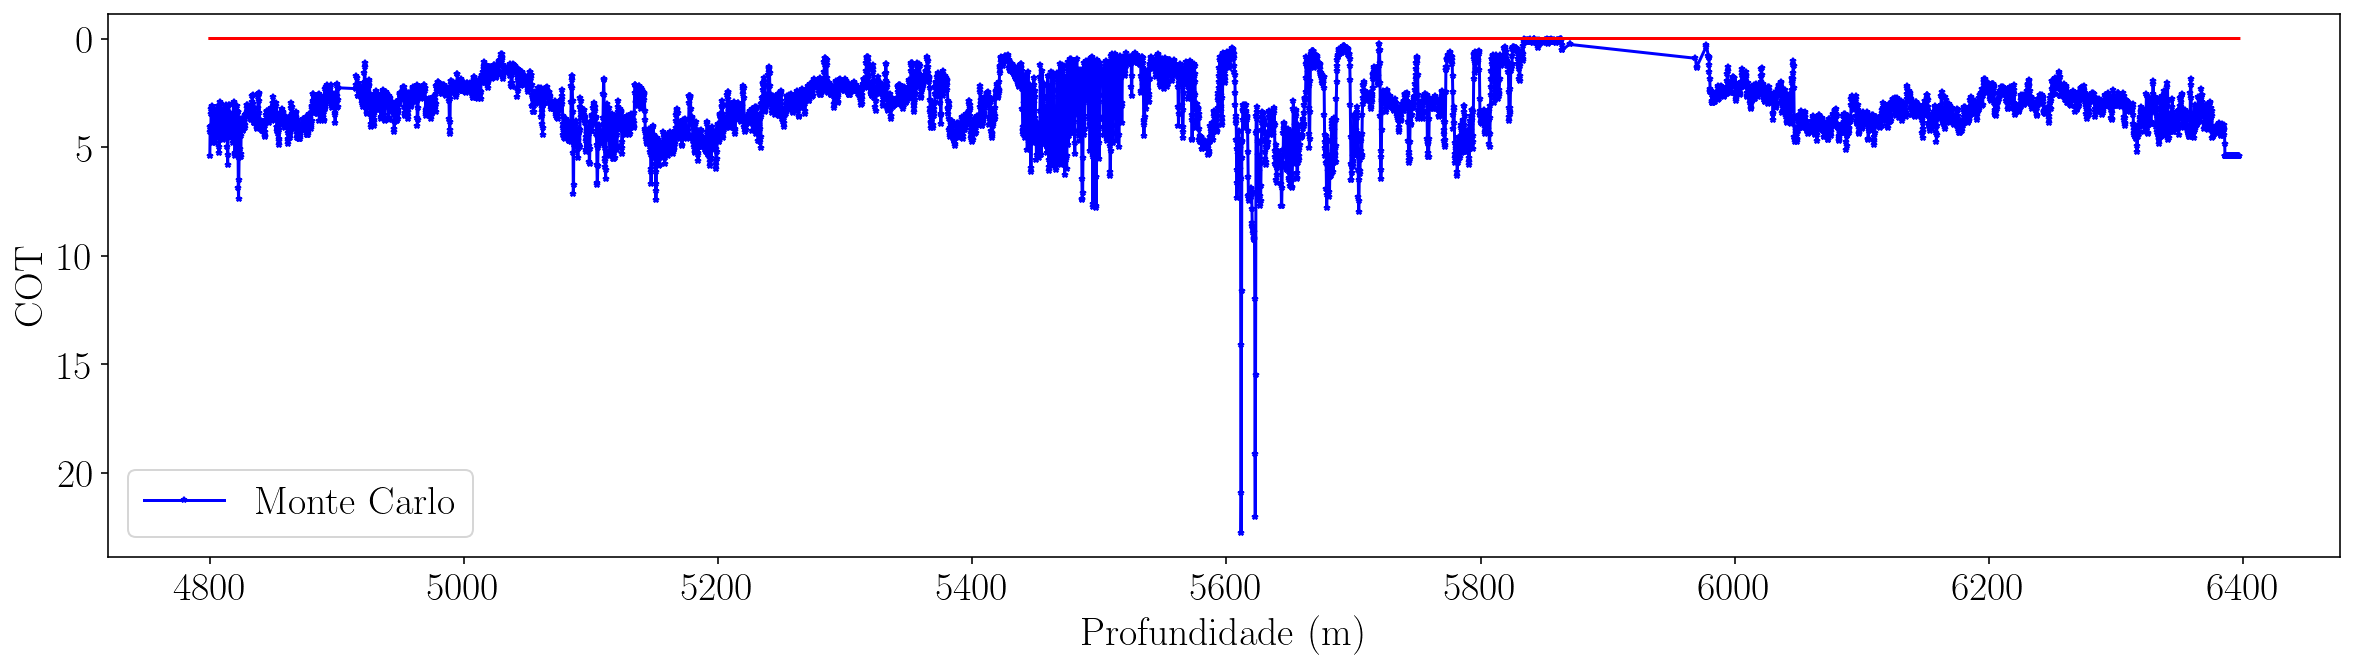

In [29]:
plt.figure(figsize=(20,5))
plt.plot(z,cot_calc-mincot,color='blue', marker='*', markersize=3,label='Monte Carlo')
plt.plot(z,np.zeros(len(z)),color='red')
plt.ylabel('COT')
plt.xlabel('Profundidade (m)')
plt.gca().invert_yaxis()   
plt.legend()
plt.savefig('../saidas/1-ESS-120_resample_cot_MMC.png')

## 5.2) Seleciona um alvo

In [30]:
print(df)

           Depth      Cali        DT        GR        LLD      NPHI      RHOB
13687  4800.1046  8.609600  70.30501  157.6507  60.520000  14.05369  2.616479
13688  4800.3046  8.609600  73.25121  127.1674  60.520000  11.76468  2.605533
13689  4800.5046  8.609600  76.35267  119.7623  60.520000  17.90119  2.585634
13690  4800.7046  8.612160  78.27454  124.3640  60.520000  21.43119  2.587109
13691  4800.9046  8.609489  76.25685  119.4625  60.520000  19.73067  2.608446
...          ...       ...       ...       ...        ...       ...       ...
21666  6395.9046  8.773004  74.54109  158.4027   6.856156  12.76359  2.693078
21667  6396.1046  8.610085  73.37498  158.4027   7.194987  12.04690  2.707989
21668  6396.3046  8.589809  72.57875  158.4027   8.382991  11.25337  2.676428
21669  6396.5046  8.569765  72.42371  158.4027   8.709688  11.04827  2.661956
21670  6396.7046  8.535995  72.51006  158.4027   8.614051  11.58292  2.664151

[7340 rows x 7 columns]


In [31]:
#Codificação do alvo desejado tempo geológico entre 89 e 100 Ma (Gálico Superior). Não tem no dado.
#Peguei o Gálico Médio 100ma 105ma
topo = 4850
base = 5800

galicodf = df

galicodf=galicodf[(galicodf['Depth'] >= topo) & (galicodf['Depth'] <= base)] # alvo! 

In [32]:
# renomeia os vetores filtrados
zgalico = galicodf[galicodf.columns[0]]#prof
DTgalico = galicodf[galicodf.columns[2]]#sonico
NPHIgalico = galicodf[galicodf.columns[5]]#neutrao
RHOBgalico = galicodf[galicodf.columns[6]]#densidade
GRgalico = galicodf[galicodf.columns[3]]#GR
LLDgalico = galicodf[galicodf.columns[4]]#resistividade

print(np.size(zgalico))


4681


In [33]:

#Calculo da linha de base:
LLDgalico_baseline = np.min(LLDgalico)
DTgalico_baseline = np.min(DTgalico)
GRgalico_baseline = np.min(GRgalico)

#Calculo do deltalogR:
galicodeltaLR = dlogr90(LLDgalico,DTgalico_baseline,DTgalico,DTgalico_baseline)

#Calculo do cot:
galicocot_calc = passey16(galicodeltaLR,alfa_otimo,beta_otimo,delta_otimo,eta_otimo,p[4],GRgalico,GRgalico_baseline)

#Valor min para o cot:
galicomincot=np.min(galicocot_calc)




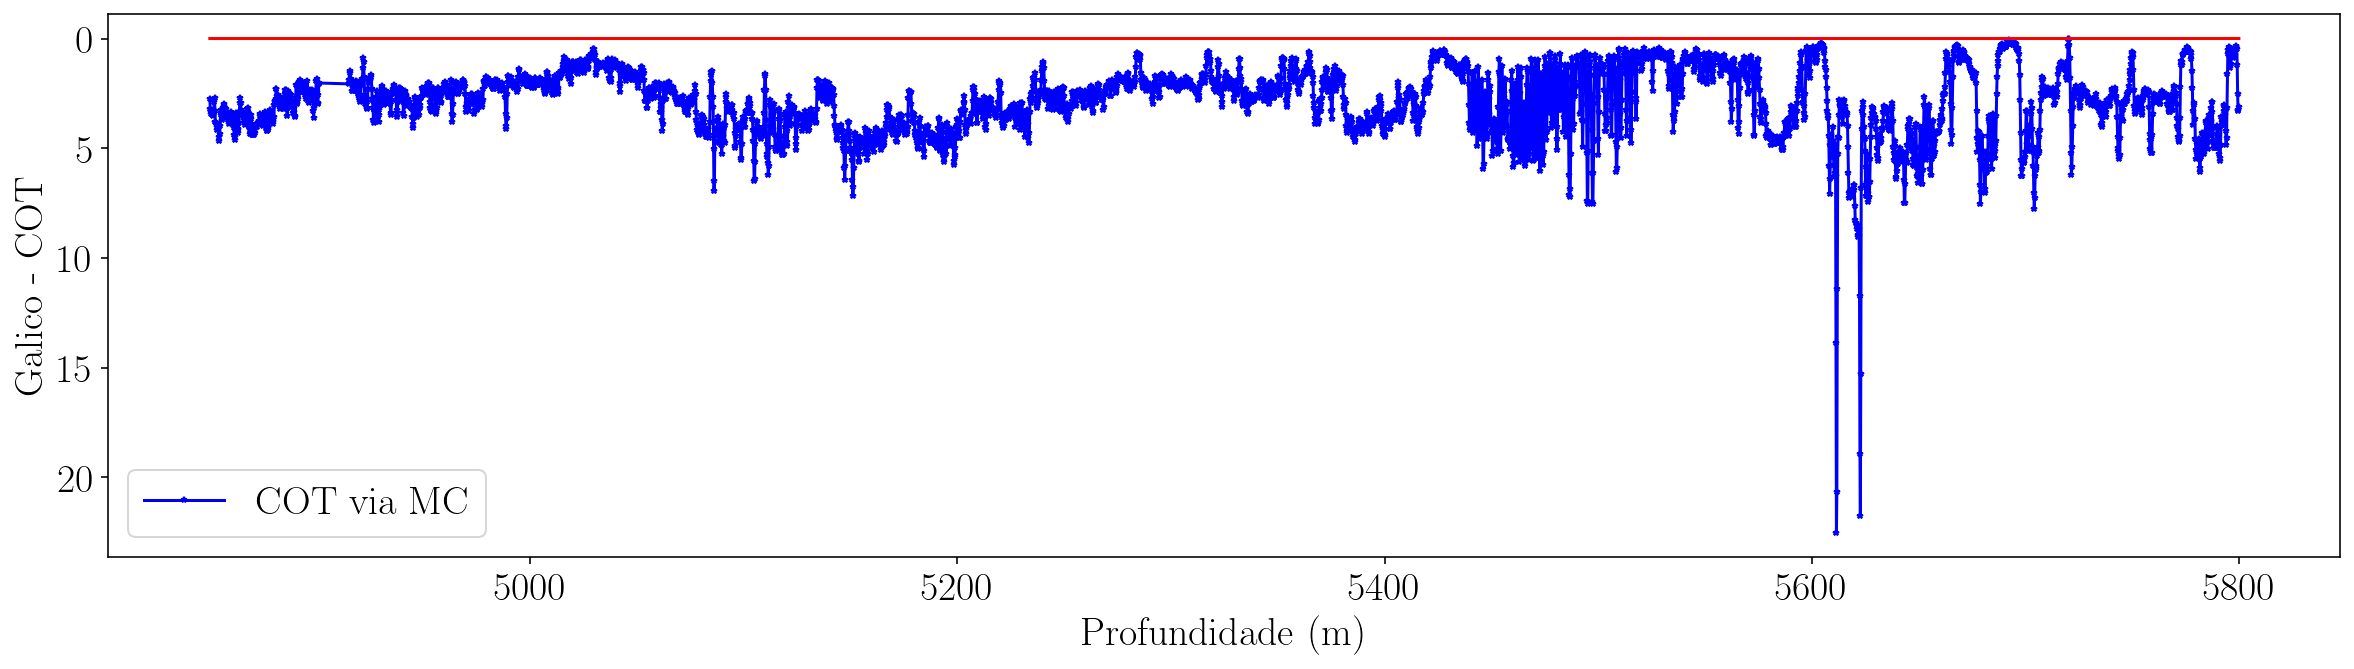

In [34]:
plt.figure(figsize=(20,5))
plt.plot(zgalico,galicocot_calc-galicomincot,color='blue', marker='*', markersize=3,label='COT via MC')
plt.plot(zgalico,np.zeros(len(zgalico)),color='red')
plt.ylabel('Galico - COT')
plt.xlabel('Profundidade (m)')
plt.gca().invert_yaxis()   
plt.legend()
plt.savefig('../saidas/Galico.png')

# Arquivos de saída COT

In [35]:
#120A
inputk = pd.DataFrame({'Depth(m)':z,'COT': cot_calc-mincot ,'DT':DT,'GR':GR,
                      'NPHI':NPHI,'RHOB':RHOB})
inputk.to_csv('../saidas/1-ESS-120_resample_COT.txt', sep=' ', index=False) 

In [36]:
#120A: Galico
inputG = pd.DataFrame({'Depth(m)':zgalico,'COT': galicocot_calc-galicomincot ,'DT':DTgalico,'GR':GRgalico,
                      'NPHI':NPHIgalico,'RHOB':RHOBgalico})
inputG.to_csv('../saidas/1-ESS-120_galico_COT.txt', sep=' ', index=False) 

# FIM